# **Подготовка датасета для мультклассовой классификации и исследование нормализации и масштабирования данных**

В этом разделе мы подготовим датасет с целевой переменной, имеющей категориальную природу. В процессе мы столкнемся с необходимостью нормализации и масштабирования данных, рассмотрим разные подходы, реализуем их самостоятельно и сравним с готовыми классами в sklearn.

Зачем подготавливать данные? Всё дело в том, что модели классического машинного обучения очень требовательны к данным. Во-первых, они работают только с числами, во вторых для многих из них важно распределение признаков, отутствие пропусков, расстояние между объектами. Также такая практика необходима, если вы хотите сделать модель интерпретируемой. Подробнее об этом мы расскажем ниже. Главное из всего этого - работа с данными - важнейшая часть работы дата сайнтиста. Во многом, от того, как он выполнит эту работу, будет зависеть дальнейший успех в обучении моделей и её ценности для бизнеса.

## **Исследование данных**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train_df.shape

(2000, 21)

In [7]:
train_df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
180,703,1,2.7,0,12,1,30,0.3,113,1,...,218,1065,1472,14,7,7,1,0,0,0
1071,1540,0,0.7,1,1,0,60,0.8,197,7,...,704,822,1591,19,0,2,1,0,1,1
337,668,0,2.3,0,2,1,48,0.3,114,1,...,195,1292,1201,14,12,4,1,1,0,0
759,1030,0,1.6,1,3,1,58,0.2,138,6,...,1111,1812,2858,6,2,18,1,1,1,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1372,561,1,2.8,1,2,1,40,0.1,99,7,...,426,865,2974,15,12,19,1,0,1,2
551,1900,1,2.0,1,1,0,41,0.5,190,8,...,912,1596,850,5,1,4,1,1,1,1
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
834,1161,0,1.3,1,0,1,21,0.6,126,8,...,308,1169,3336,6,4,14,1,0,1,3
1927,1023,1,0.7,0,2,1,63,0.7,153,7,...,367,1985,3155,11,10,7,1,1,1,3


In [8]:
for i in train_df.columns:
    print(train_df[i].value_counts())
    print()

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

blue
0    1010
1     990
Name: count, dtype: int64

clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64

dual_sim
1    1019
0     981
Name: count, dtype: int64

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

four_g
1    1043
0     957
Name: count, dtype: int64

int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: co

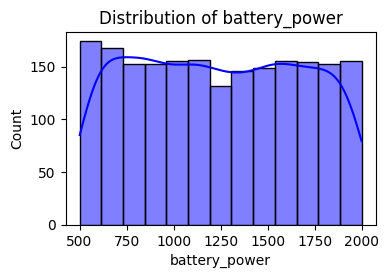

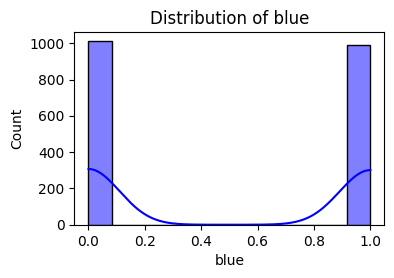

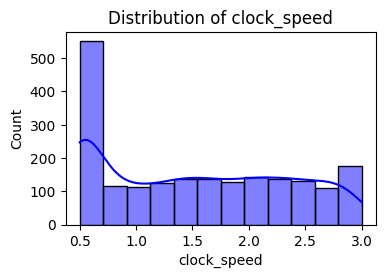

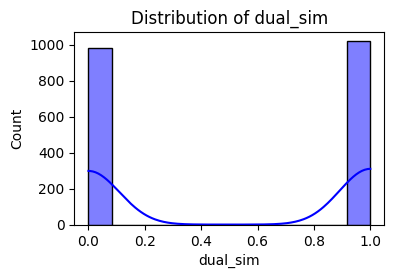

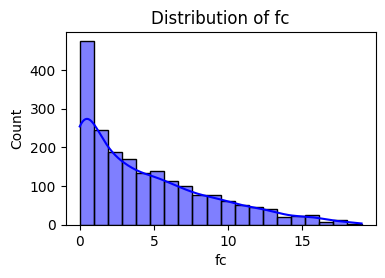

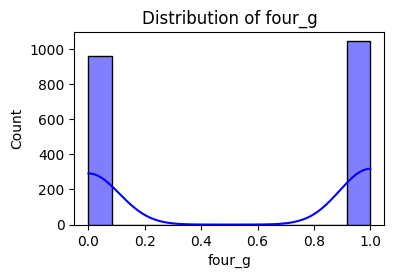

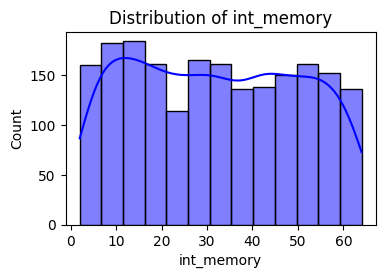

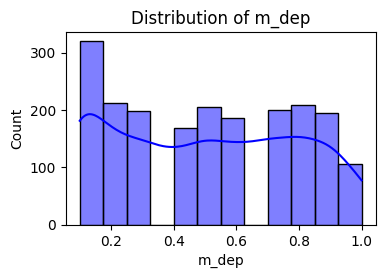

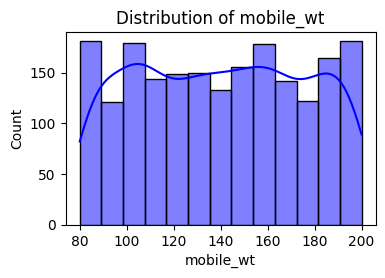

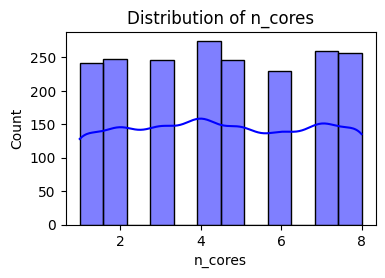

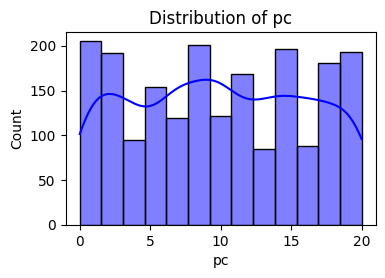

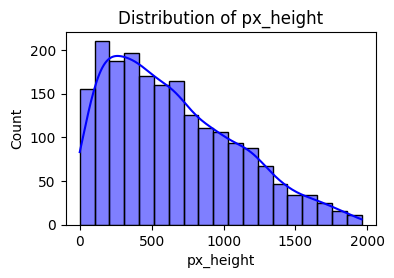

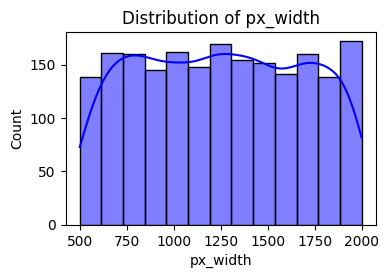

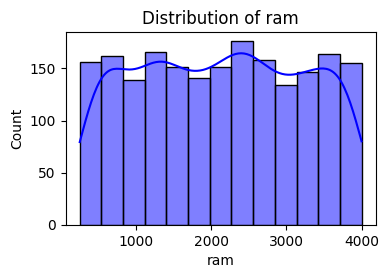

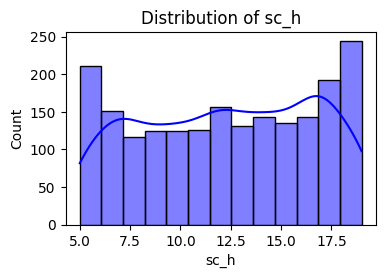

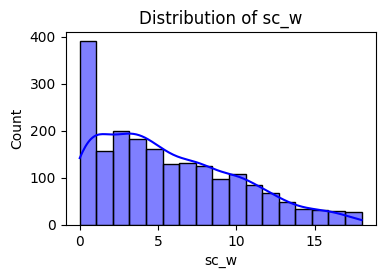

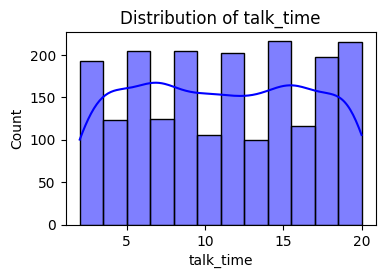

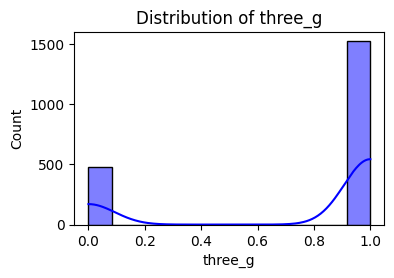

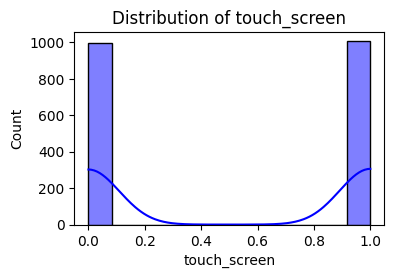

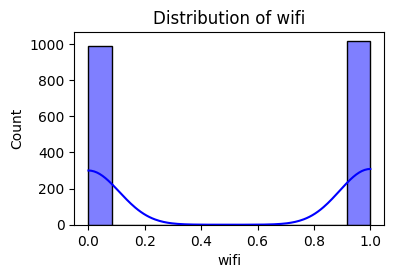

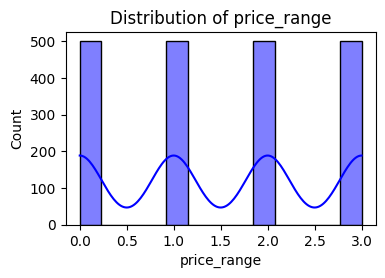

In [9]:
def show_distributions():
    numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        plt.figure(figsize=(4, 2.5))
        sns.histplot(train_df[feature], kde=True, color='blue')
        plt.title(f'Distribution of {feature}')
        plt.show()

show_distributions()

Судя по нашему разведочному анализу данных мы имеем дело с разными типами признаков. Некоторые из них непрерывные, другие - категориальные. 

Также ни в одном из них не наблюдается нормального (Гауссовского) распределения, зато, судя по графикам, есть распределения похожие на равномерное (batterey_power, int_memory, mobile_wt, px_width, ram, sc_h), экспоненциальное (fc), отрицательное биномиальное распределение (px_height, sc_w)

Также стоит заметить, что не все из этих принаков имеют природу непрерывной случайной величины. Скорее они категориальный, просто классов много. А раз многие из них категориальные, то к ним нельзя применять понятия непрерывного распределения, к которым относятся (нормальное, экспоненциальное), но о них можно говорить в контексте распределения Бернулли, биноминального распределения. Подробнее мы об этом поговоримв разделе "Предобработка данных"

А пока что поработаем с выбросами.

### Работа с выбросами

В категориальных признаках врядли найдутся выбросы, так как там заранее известно количество категорий. Поэтому заранее определним, какие признаки мы будем считать непрерывными

In [10]:
num_cols = []
not_binary_cat_cols = []
binary_cat_cols = []

In [11]:
for col in train_df.columns:    
    print(f"{col} {len(train_df[col].value_counts())}")
    feature_cnt = len(train_df[col].value_counts())
    if col != 'price_range':
        if feature_cnt == 2:
            binary_cat_cols.append(col)
        elif feature_cnt < 1000:
            not_binary_cat_cols.append(col)
        else:
            num_cols.append(col)

print(len(train_df.columns))

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4
21


In [12]:
print(num_cols)
print(not_binary_cat_cols)
print(binary_cat_cols)

['battery_power', 'px_height', 'px_width', 'ram']
['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


Пусть признаки, у которых количество уникальных значений больше 1000 считаются непрерывными, остальные - категориальными.

Теперрь исследуем на выбросы наши 4 непрерывных признака: 'battery_power', 'px_height', 'px_width', 'ram' 

<Axes: >

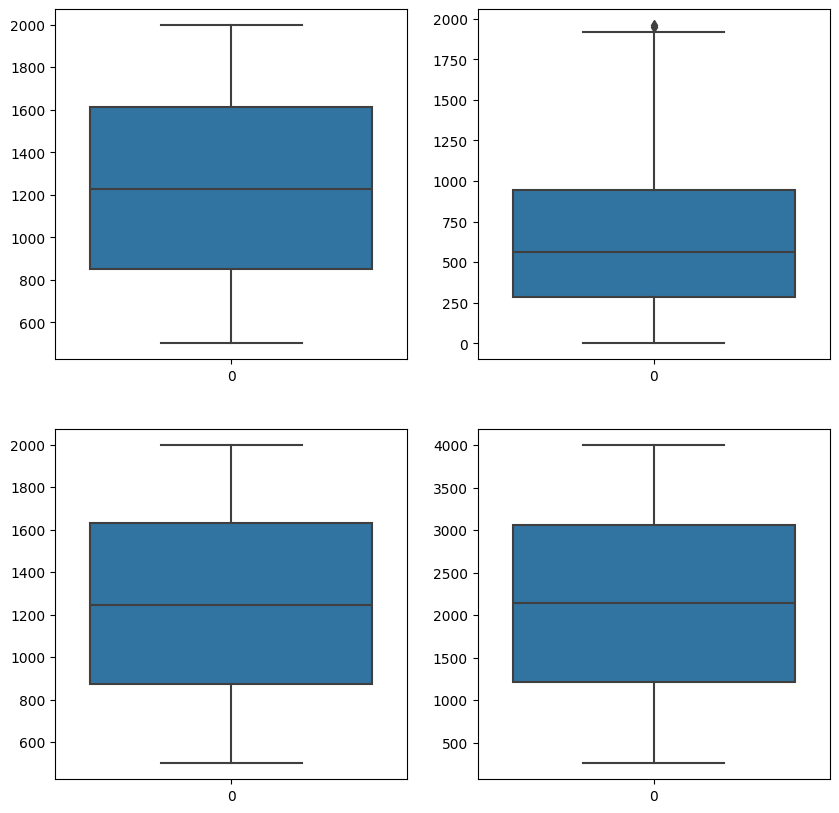

In [13]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))

sns.boxplot(data=train_df['battery_power'], ax=axes[0,0])
sns.boxplot(data=train_df['px_height'],ax=axes[0,1])
sns.boxplot(data=train_df['px_width'], ax=axes[1,0])
sns.boxplot(data=train_df['ram'],ax=axes[1,1])

Такие графики называются "boxplot" и содержат очень ценную статистическую информацию о данных, которые визуализируют. Из боксплота можно узнать следующее:  
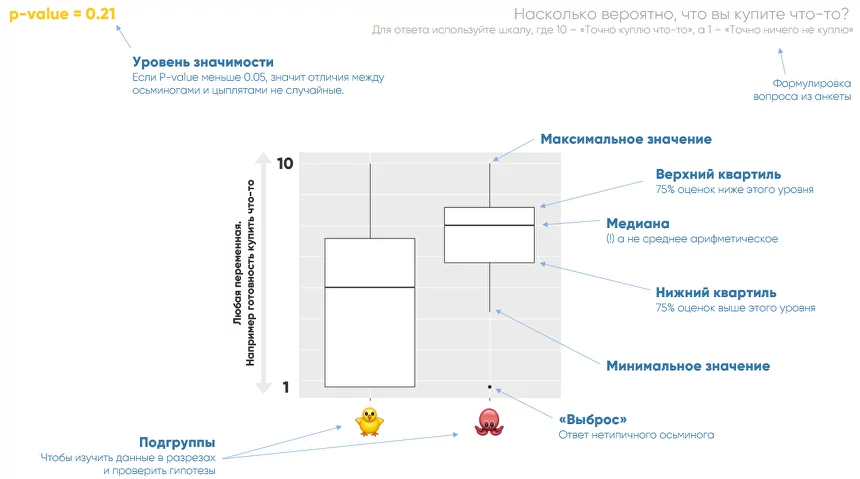

**Верхний квартиль** – это такая оценка, выше которой только 25% оценок.

**Нижний квартиль** – это такое значение, ниже которого только 25% оценок.

**Межквартильный размах (МКР)** – это разница между 75% и 25% квартилем. Внутри этого диапазона лежит 50% наблюдений. Если диапазон узкий (как в случае с осьминогами), значит члены подгруппы единогласны в своих оценках. Если широкий – значит однородного мнения нет (как у цыплят).

**Выбросы** – это нетипичные наблюдения. Что именно считать нетипичным? Зависит от контекста, но можно прибегнуть к следующем расчетам:
Выбросы – это значения за пределами:
1) 25% перцентили минус 1.5 х МКР
2) 75% перцентили плюс 1.5 х МКР

По такому определению выбросы есть только у px_height. Давайте посмотрим на эти выбросы

In [14]:
def find_outliers(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    sd  = df[feature].describe()
    q_75 = sd[6]
    q_25 = sd[4]
    iqr = q_75 - q_25
    upper  = q_75 + 1.5*iqr
    lower = q_25 - 1.5*iqr

    return df[(df[feature] >= upper) | (df[feature] <= lower)] 

In [15]:
find_outliers(train_df, 'px_height')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


**Стоит ли удалять из данных эти выбросы?**

**Аргументы за**: 
1) Выбросы мешают нормализации данных. Стандартизация нам не подойдёт, так как данные далеки от нормального распределения.

**Аргументы против**: 
1) У нас не так уж и много данных, всего 2000 строк
2) Выброс наблюдается только в признаке px_height
3) У нас не так уж и много непрерывных признаков, чтобы заботиться о нормализации. В этом датасете гораздо важнее работа с категориальными признаками

Что-ж, аргементов против в 3 раза больше, а значит, пока-что оставим эти выбросы.

In [16]:
#Небольшой лайфхак, если и в pandas хочется избавиться от научной записи чисел, то выполняйте следующую строку кода
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns='price_range'), train_df['price_range'], test_size=0.2, random_state=42)

# **Масштабирование. Нормализация и стандартизация данных**

В данном датасете все признаки численные. Однако они имеют разные масштабы. Если оставить их такими, 
некоторые модели обучатся плохо (KNN - большие признаки будут давать большое расстояние и влиять на результат в основном будут только они), 
некоторые могут обучиться, но интерпретировать их будет сложно (Линейные модели - без стандартизации большой вес признака не всегда будет означать его важность. И всё таки, данные находящиеся в одном диапазоне, ускоряют сходимость таких моделей). 
А для некоторых моделей масштаб неважен (Деревья решений и их ансамбли строятся на создании решающих правил для признаков)

В общем, лучше проводить нормализацию или стандартизацию

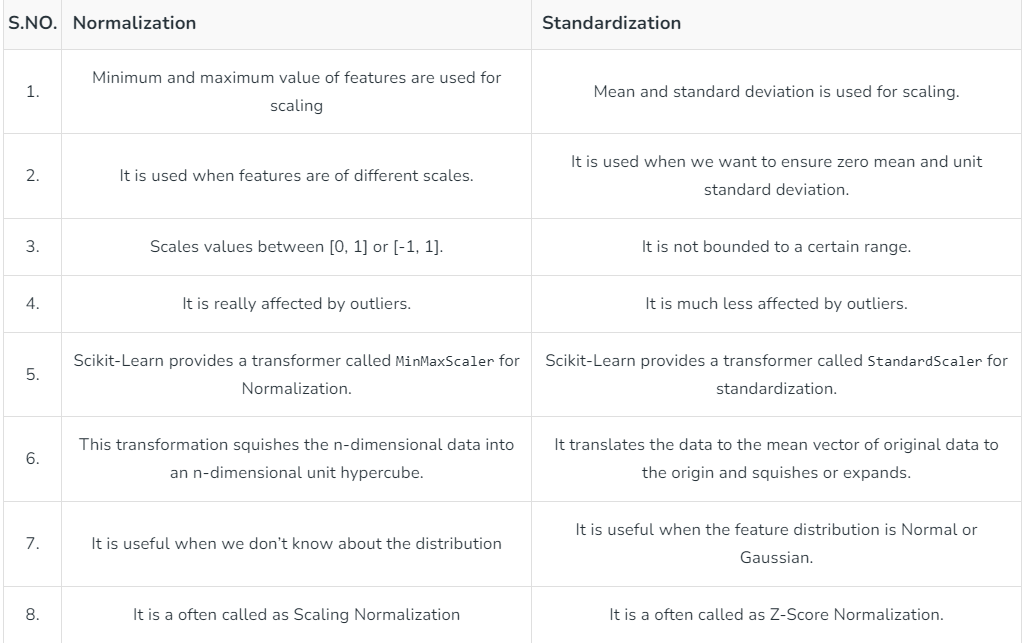

## **Стандартизация**

*Стандартизация наборов данных является общим требованием для многих оценщиков машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные характеристики более или менее не похожи на стандартные нормально распределенные данные: гауссовские с нулевым средним значением и единичной дисперсией.* - **Документация sklearn**

**Шпоргалка распределений** 

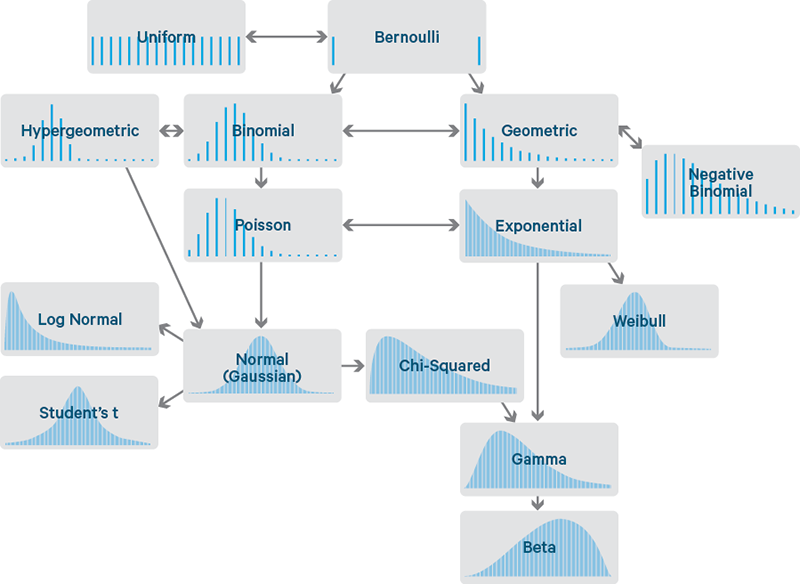 

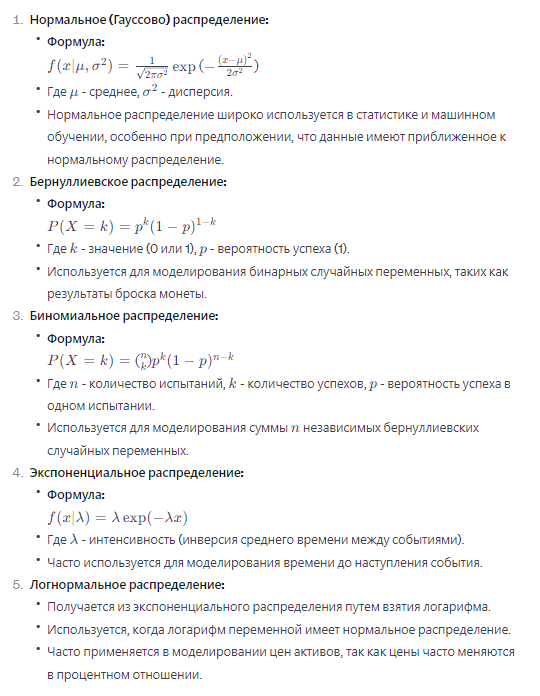

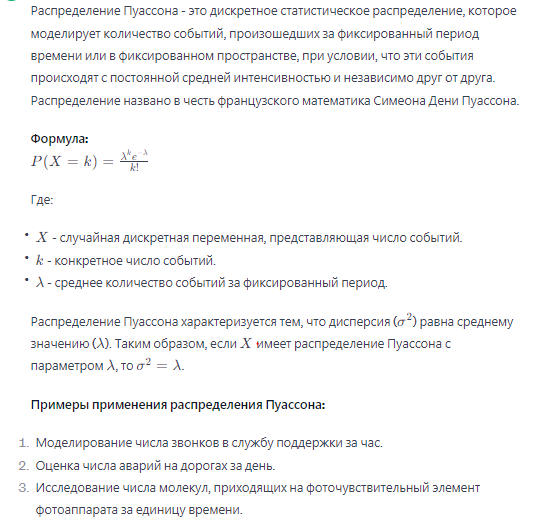

Итак, стандартизация. 

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.


### Реализуем стандартизацию:

In [18]:
means = X_train.mean()
stds = X_train.std()

In [19]:
X_train_std = (X_train - means) / stds
X_train_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.6786,-0.9811,-1.2358,-1.0301,-0.9933,-1.0457,-1.6636,-1.4032,-1.7158,-1.5470,-1.6423,-1.4463,-1.7359,-1.7194,-1.7169,-1.3150,-1.6262,-1.7943,-1.0097,-0.9972
25%,-0.8822,-0.9811,-1.0225,-1.0301,-0.7628,-1.0457,-0.8942,-1.0547,-0.8952,-0.6736,-0.8110,-0.8177,-0.8692,-0.8359,-0.7657,-0.8541,-0.9000,0.5570,-1.0097,-0.9972
50%,-0.0223,-0.9811,-0.0166,0.9701,-0.3019,0.9557,0.0126,-0.0089,0.0104,-0.2369,0.0203,-0.2014,-0.0176,-0.0052,-0.0523,-0.1626,0.0078,0.5570,0.9897,-0.9972
75%,0.8581,1.0186,0.8673,0.9701,0.6199,0.9557,0.8645,1.0368,0.8593,1.0732,0.8515,0.6764,0.8740,0.8567,0.8989,0.7593,0.9156,0.5570,0.9897,1.0022
max,1.7180,1.0186,1.8122,0.9701,3.3853,0.9557,1.7439,1.7339,1.6799,1.5098,1.6828,2.9539,1.7355,1.7413,1.6122,2.8335,1.6419,0.5570,0.9897,1.0022


In [20]:
X_test_std = (X_test - means) / stds #Очень важно заметить, что тестовую выборку мы стандартизируем, используя means и std тренировочной выборки! 
#Если стандартизировать отдельно, это будет неправильно и являтся искажением данных
X_test_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,-0.0260,0.0437,0.0526,-0.0550,-0.0006,-0.0100,-0.0614,-0.0142,-0.0544,-0.0480,0.0319,0.0099,0.0281,0.0374,0.1028,0.0707,0.0491,-0.0191,-0.0200,0.0825
std,0.9860,1.0008,0.9743,1.0011,1.0037,1.0013,0.9860,1.0276,1.0088,0.9956,1.0414,0.9825,1.0087,1.0192,1.0064,1.0193,0.9598,1.0125,1.0009,0.9977
min,-1.6763,-0.9811,-1.2358,-1.0301,-0.9933,-1.0457,-1.6636,-1.4032,-1.7158,-1.5470,-1.6423,-1.4373,-1.7359,-1.7212,-1.7169,-1.3150,-1.6262,-1.7943,-1.0097,-0.9972
25%,-0.8879,-0.9811,-0.8701,-1.0301,-0.7628,-1.0457,-0.8942,-1.0547,-0.9305,-1.1103,-0.9773,-0.8053,-0.8374,-0.8831,-0.7657,-0.8541,-0.7184,0.5570,-1.0097,-0.9972
50%,-0.0608,1.0186,0.1053,-1.0301,-0.3019,0.9557,-0.2622,-0.0089,-0.0745,-0.2369,0.0203,-0.1375,0.0554,0.1114,0.1855,-0.1626,0.0078,0.5570,-1.0097,1.0022
75%,0.8201,1.0186,0.8368,0.9701,0.6199,0.9557,0.7546,1.0368,0.7532,0.6365,0.8931,0.6865,0.9360,0.9495,0.8989,0.7593,0.7795,0.5570,0.9897,1.0022
max,1.7067,1.0186,1.8122,0.9701,3.1549,0.9557,1.7439,1.7339,1.6799,1.5098,1.6828,2.7608,1.7332,1.7367,1.6122,2.8335,1.6419,0.5570,0.9897,1.0022


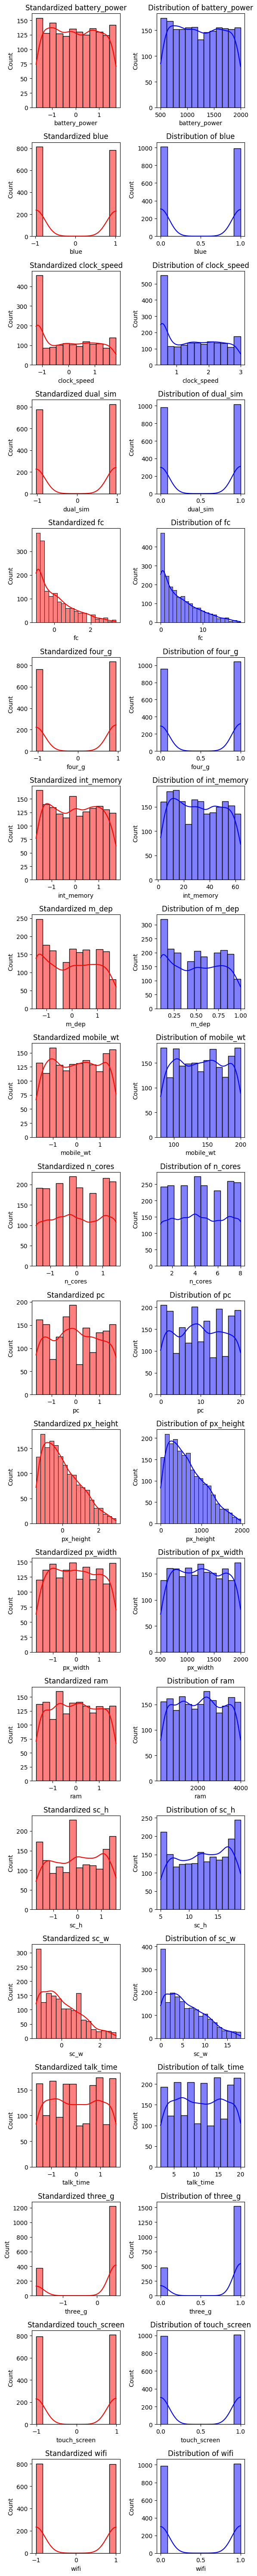

In [21]:
numeric_features = X_train_std.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numeric_features), ncols=2, figsize=(6, len(numeric_features) * 3))

for i, feature in enumerate(numeric_features):

    sns.histplot(X_train_std[feature], kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'Standardized {feature}')

    sns.histplot(train_df[feature], kde=True, color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {feature}')

plt.tight_layout()

plt.show()

### Стандартизация в sklearn

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_sk_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sk_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
X_train_sk_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-1.6791,-0.9814,-1.2362,-1.0305,-0.9936,-1.0461,-1.6641,-1.4037,-1.7164,-1.5474,-1.6428,-1.4467,-1.7364,-1.7199,-1.7174,-1.3154,-1.6267,-1.7949,-1.0101,-0.9975
25%,-0.8825,-0.9814,-1.0228,-1.0305,-0.7630,-1.0461,-0.8945,-1.0550,-0.8955,-0.6738,-0.8113,-0.8179,-0.8695,-0.8362,-0.7659,-0.8543,-0.9003,0.5571,-1.0101,-0.9975
50%,-0.0223,-0.9814,-0.0166,0.9704,-0.3020,0.9560,0.0126,-0.0089,0.0104,-0.2370,0.0203,-0.2015,-0.0176,-0.0052,-0.0523,-0.1627,0.0078,0.5571,0.9900,-0.9975
75%,0.8584,1.0189,0.8676,0.9704,0.6201,0.9560,0.8648,1.0371,0.8596,1.0735,0.8518,0.6766,0.8743,0.8570,0.8991,0.7595,0.9159,0.5571,0.9900,1.0025
max,1.7186,1.0189,1.8128,0.9704,3.3864,0.9560,1.7444,1.7345,1.6805,1.5103,1.6833,2.9548,1.7360,1.7419,1.6127,2.8344,1.6424,0.5571,0.9900,1.0025


In [26]:
X_test_sk_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,-0.0260,0.0438,0.0526,-0.0550,-0.0006,-0.0100,-0.0614,-0.0142,-0.0545,-0.0481,0.0319,0.0099,0.0281,0.0374,0.1029,0.0707,0.0492,-0.0191,-0.0200,0.0825
std,0.9863,1.0011,0.9746,1.0014,1.0040,1.0017,0.9864,1.0280,1.0091,0.9960,1.0417,0.9828,1.0090,1.0195,1.0067,1.0197,0.9601,1.0128,1.0013,0.9980
min,-1.6769,-0.9814,-1.2362,-1.0305,-0.9936,-1.0461,-1.6641,-1.4037,-1.7164,-1.5474,-1.6428,-1.4377,-1.7364,-1.7217,-1.7174,-1.3154,-1.6267,-1.7949,-1.0101,-0.9975
25%,-0.8881,-0.9814,-0.8703,-1.0305,-0.7630,-1.0461,-0.8945,-1.0550,-0.9308,-1.1106,-0.9776,-0.8056,-0.8376,-0.8834,-0.7659,-0.8543,-0.7186,0.5571,-1.0101,-0.9975
50%,-0.0608,1.0189,0.1053,-1.0305,-0.3020,0.9560,-0.2622,-0.0089,-0.0746,-0.2370,0.0203,-0.1375,0.0554,0.1114,0.1855,-0.1627,0.0078,0.5571,-1.0101,1.0025
75%,0.8204,1.0189,0.8371,0.9704,0.6201,0.9560,0.7548,1.0371,0.7534,0.6367,0.8934,0.6867,0.9363,0.9498,0.8991,0.7595,0.7797,0.5571,0.9900,1.0025
max,1.7072,1.0189,1.8128,0.9704,3.1559,0.9560,1.7444,1.7345,1.6805,1.5103,1.6833,2.7617,1.7337,1.7372,1.6127,2.8344,1.6424,0.5571,0.9900,1.0025


## **Нормализация**

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

### Реализуем самостоятельно

In [27]:
mins = X_train.min()
maxs = X_train.max()

X_train_norm = (X_train - mins)/(maxs - mins)

In [28]:
X_train_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.4942,0.4906,0.4055,0.5150,0.2268,0.5225,0.4882,0.4473,0.5053,0.5061,0.4939,0.3287,0.5001,0.4968,0.5157,0.3170,0.4976,0.7631,0.5050,0.4988
std,0.2944,0.5001,0.3281,0.4999,0.2284,0.4996,0.2935,0.3188,0.2945,0.3271,0.3007,0.2273,0.2881,0.2890,0.3004,0.2410,0.3060,0.4253,0.5001,0.5002
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2345,0.0000,0.0700,0.0000,0.0526,0.0000,0.2258,0.1111,0.2417,0.2857,0.2500,0.1429,0.2497,0.2553,0.2857,0.1111,0.2222,1.0000,0.0000,0.0000
50%,0.4876,0.0000,0.4000,1.0000,0.1579,1.0000,0.4919,0.4444,0.5083,0.4286,0.5000,0.2829,0.4950,0.4953,0.5000,0.2778,0.5000,1.0000,1.0000,0.0000
75%,0.7468,1.0000,0.6900,1.0000,0.3684,1.0000,0.7419,0.7778,0.7583,0.8571,0.7500,0.4824,0.7518,0.7444,0.7857,0.5000,0.7778,1.0000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [29]:
X_test_norm = (X_test - mins)/(maxs-mins) #Опять-таки важно заметить, мы приводим данные тестовой выборки к масштабу относительно тренировочной (mins и maxs - с тренировочной выборки)

### Нормализация в sklearn

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
norm_scaler = MinMaxScaler()

norm_scaler.fit(X_train)

X_train_sk_norm = pd.DataFrame(norm_scaler.transform(X_train), columns=(X_train.columns))
X_test_sk_norm = pd.DataFrame(norm_scaler.transform(X_test), columns=(X_test.columns))

In [32]:
X_train_sk_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.4942,0.4906,0.4055,0.5150,0.2268,0.5225,0.4882,0.4473,0.5053,0.5061,0.4939,0.3287,0.5001,0.4968,0.5157,0.3170,0.4976,0.7631,0.5050,0.4988
std,0.2944,0.5001,0.3281,0.4999,0.2284,0.4996,0.2935,0.3188,0.2945,0.3271,0.3007,0.2273,0.2881,0.2890,0.3004,0.2410,0.3060,0.4253,0.5001,0.5002
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2345,0.0000,0.0700,0.0000,0.0526,0.0000,0.2258,0.1111,0.2417,0.2857,0.2500,0.1429,0.2497,0.2553,0.2857,0.1111,0.2222,1.0000,0.0000,0.0000
50%,0.4876,0.0000,0.4000,1.0000,0.1579,1.0000,0.4919,0.4444,0.5083,0.4286,0.5000,0.2829,0.4950,0.4953,0.5000,0.2778,0.5000,1.0000,1.0000,0.0000
75%,0.7468,1.0000,0.6900,1.0000,0.3684,1.0000,0.7419,0.7778,0.7583,0.8571,0.7500,0.4824,0.7518,0.7444,0.7857,0.5000,0.7778,1.0000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## **Robust Scaler**

Robust scaler использует медиану и интерквартильный размах вместо среднего и стандартного отклонения, чтобы устойчиво масштабировать данные к выбросам.

Для того, чтобы сделать Robust scale данных нужно посчитать в каждом признаке его медиану (median), квартили (Q3, Q1), а затем сделать следующее вычисление:

$$x = \frac{x - med}{Q_{3} - Q_{1}}$$

После такого преобразования $median = 0

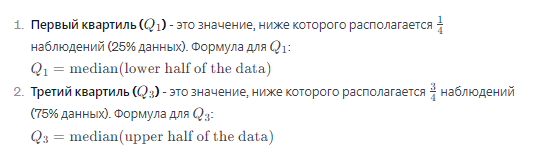

### Реализуем самостоятельно

In [33]:
q_1, q_2, q_3 = np.percentile(X_train, [25, 50, 75], axis = 0)

In [34]:
X_train_rob = (X_train - q_2)/(q_3-q_1)

In [35]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5000,1,7,0,46,0.5000,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2000,0,0,1,49,0.1000,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9000,1,2,1,57,0.1000,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1000,0,2,0,38,0.4000,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5000,1,7,0,7,0.4000,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9000,1,2,0,31,0.9000,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5000,0,1,1,59,0.7000,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5000,0,0,1,15,0.4000,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9000,1,3,0,11,0.4000,190,8,12,491,1506,2916,16,11,18,0,1,1


In [36]:
X_train_rob.describe()

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,379.0000,1600.0000,1600.0000
mean,0.0128,0.4906,0.0088,-0.4850,0.2183,-0.4775,-0.0072,0.0043,-0.0059,0.1356,-0.0122,0.1348,0.0101,0.0031,0.0314,0.1008,-0.0043,-inf,-0.4950,0.4988
std,0.5746,0.5001,0.5292,0.4999,0.7232,0.4996,0.5686,0.4781,0.5700,0.5725,0.6015,0.6693,0.5737,0.5908,0.6008,0.6198,0.5508,NaN,0.5001,0.5002
min,-0.9518,0.0000,-0.6452,-1.0000,-0.5000,-1.0000,-0.9531,-0.6667,-0.9839,-0.7500,-1.0000,-0.8332,-0.9857,-1.0127,-1.0000,-0.7143,-0.9000,-inf,-1.0000,0.0000
25%,-0.4941,0.0000,-0.5323,-1.0000,-0.3333,-1.0000,-0.5156,-0.5000,-0.5161,-0.2500,-0.5000,-0.4125,-0.4885,-0.4908,-0.4286,-0.4286,-0.5000,NaN,-1.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000
75%,0.5059,1.0000,0.4677,0.0000,0.6667,0.0000,0.4844,0.5000,0.4839,0.7500,0.5000,0.5875,0.5115,0.5092,0.5714,0.5714,0.5000,NaN,0.0000,1.0000
max,1.0000,1.0000,0.9677,0.0000,2.6667,0.0000,0.9844,0.8333,0.9516,1.0000,1.0000,2.1119,1.0056,1.0318,1.0000,1.8571,0.9000,-inf,0.0000,1.0000


### Robust Scaler в sklearn

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
rob_scaler = RobustScaler()

rob_scaler.fit(X_train)

X_train_sk_rob = pd.DataFrame(rob_scaler.transform(X_train), columns=(X_train.columns))
X_test_sk_rob = pd.DataFrame(rob_scaler.transform(X_test), columns=(X_test.columns))

In [39]:
X_train_rob.describe()

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,379.0000,1600.0000,1600.0000
mean,0.0128,0.4906,0.0088,-0.4850,0.2183,-0.4775,-0.0072,0.0043,-0.0059,0.1356,-0.0122,0.1348,0.0101,0.0031,0.0314,0.1008,-0.0043,-inf,-0.4950,0.4988
std,0.5746,0.5001,0.5292,0.4999,0.7232,0.4996,0.5686,0.4781,0.5700,0.5725,0.6015,0.6693,0.5737,0.5908,0.6008,0.6198,0.5508,NaN,0.5001,0.5002
min,-0.9518,0.0000,-0.6452,-1.0000,-0.5000,-1.0000,-0.9531,-0.6667,-0.9839,-0.7500,-1.0000,-0.8332,-0.9857,-1.0127,-1.0000,-0.7143,-0.9000,-inf,-1.0000,0.0000
25%,-0.4941,0.0000,-0.5323,-1.0000,-0.3333,-1.0000,-0.5156,-0.5000,-0.5161,-0.2500,-0.5000,-0.4125,-0.4885,-0.4908,-0.4286,-0.4286,-0.5000,NaN,-1.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000
75%,0.5059,1.0000,0.4677,0.0000,0.6667,0.0000,0.4844,0.5000,0.4839,0.7500,0.5000,0.5875,0.5115,0.5092,0.5714,0.5714,0.5000,NaN,0.0000,1.0000
max,1.0000,1.0000,0.9677,0.0000,2.6667,0.0000,0.9844,0.8333,0.9516,1.0000,1.0000,2.1119,1.0056,1.0318,1.0000,1.8571,0.9000,-inf,0.0000,1.0000


In [40]:
X_train_rob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 968 to 1126
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   float64
 1   blue           1600 non-null   float64
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   float64
 4   fc             1600 non-null   float64
 5   four_g         1600 non-null   float64
 6   int_memory     1600 non-null   float64
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   float64
 9   n_cores        1600 non-null   float64
 10  pc             1600 non-null   float64
 11  px_height      1600 non-null   float64
 12  px_width       1600 non-null   float64
 13  ram            1600 non-null   float64
 14  sc_h           1600 non-null   float64
 15  sc_w           1600 non-null   float64
 16  talk_time      1600 non-null   float64
 17  three_g        379 non-null    float64
 18  touch_scree

Стоит заметить, что после такого преобразования данные о колонке three_g псоле масштабирования стали такими:
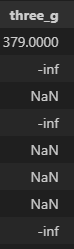

Отсюда можно сделать вывод, что масштабировать или нормализовывать категориальные признаки лучше не стоит. В самом деле, для них термины mean, std, Q3, Q1 не применимы. Здравый смысл подсказывает, что нормализация и масштабирование лишь для признаков с непрерывным значением.

## **Другое значение нормализации**

Нормализация признака таже может означать приведение распределения признака к нормальному. Для этого существует множествао способов. Вот основные:
1) Box-Cox Transformation
2) Обратное преобразование
3) Логарифмирование
4) Возведение в степень
5) Преобразование Йео-Джонсона

https://habr.com/ru/articles/695556/

# **Предобработка данных**

Мы изучили основные способы масштабирования данных для самых разных случаев. Теперь нужно предобработать эти данные

<!-- X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns='price_range'), train_df['price_range'], test_size=0.2, random_state=42) -->

In [41]:
scaled_train_df = train_df

In [42]:
train_df.sample(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
305,1348,0,2.0000,0,18,0,52,0.3000,98,3,...,1869,1942,955,18,11,7,1,1,1,1
1933,897,1,2.0000,0,3,1,2,0.6000,154,8,...,0,994,1958,7,5,7,1,1,0,1
1327,948,0,2.3000,0,14,0,22,0.1000,173,5,...,257,1654,3499,11,7,19,1,1,1,3


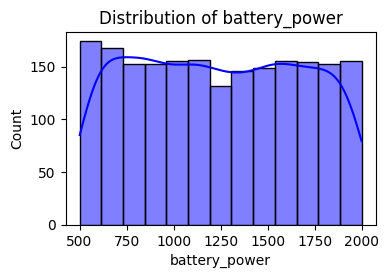

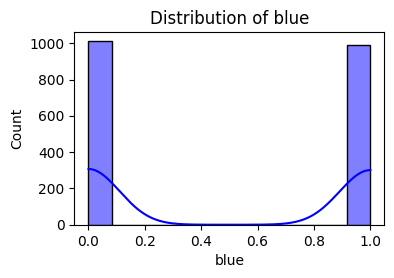

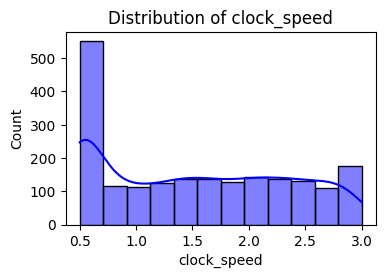

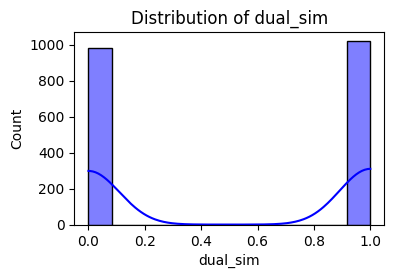

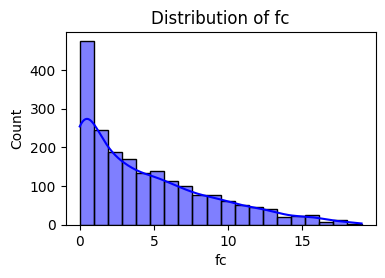

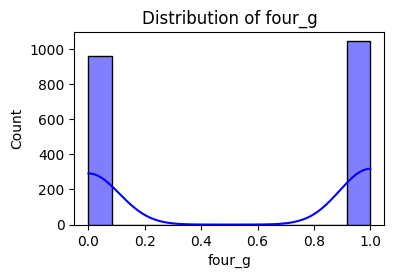

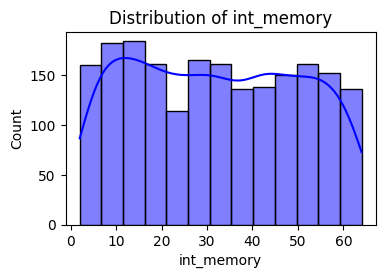

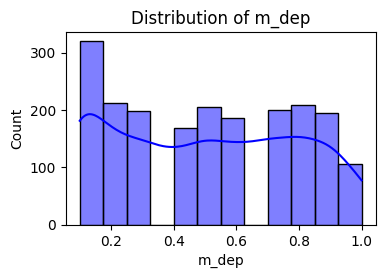

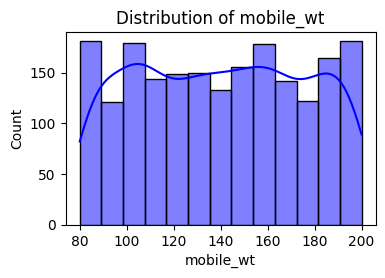

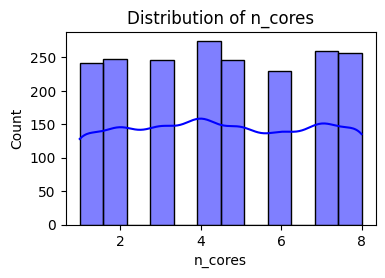

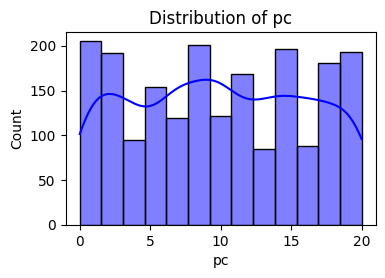

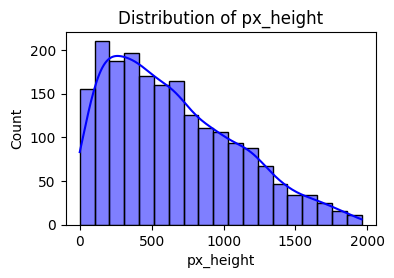

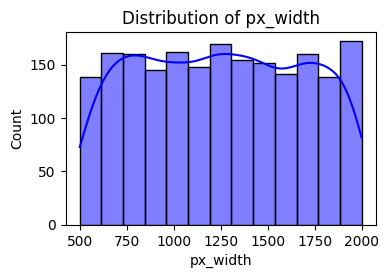

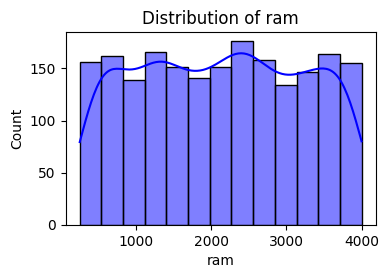

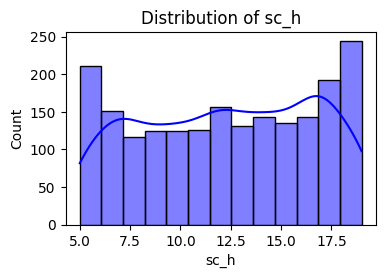

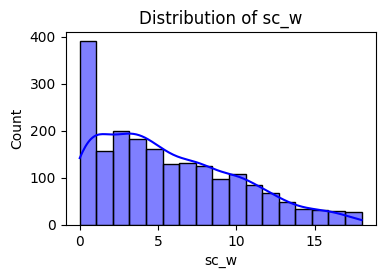

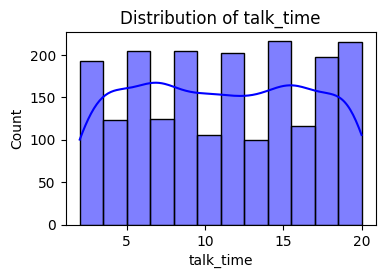

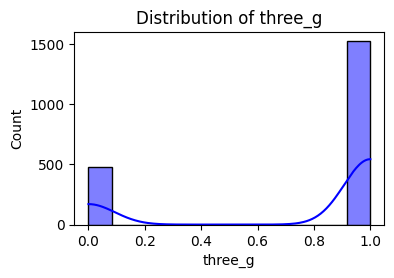

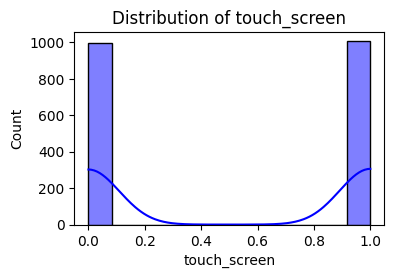

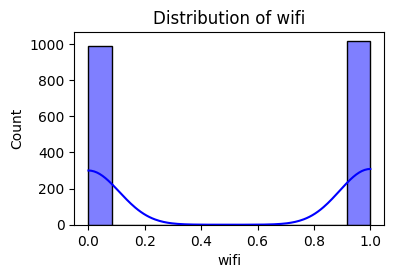

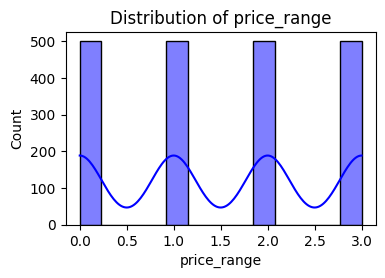

In [43]:
show_distributions()

In [44]:
num_cols = ['battery_power', 'px_height', 'px_width', 'ram']
not_binary_cat_cols = ['clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']
binary_cat_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

print(len(num_cols) + len(not_binary_cat_cols) + len(binary_cat_cols))

19


In [45]:
num_cols = []
not_binary_cat_cols = []
binary_cat_cols = []

In [46]:
for col in train_df.columns:    
    print(f"{col} {len(train_df[col].value_counts())}")
    feature_cnt = len(train_df[col].value_counts())
    if col != 'price_range':
        if feature_cnt == 2:
            binary_cat_cols.append(col)
        elif feature_cnt < 1000:
            not_binary_cat_cols.append(col)
        else:
            num_cols.append(col)

print(len(train_df.columns))

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4
21


In [47]:
print(num_cols)
print(not_binary_cat_cols)
print(binary_cat_cols)

['battery_power', 'px_height', 'px_width', 'ram']
['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


Стоит отметить также, что категориальные переменные делятся на *номинальные* - порядок которых не определен (цвета, города, память телефона) и *упорядоченные* - признаки, у которых порядок определен (города, ранжированные по близости к столице, телефоны, ранжированные по количеству ядер)

Можно заметить, что категориальные признаки могут иметь по несколько классов (больше двух). Мы, конечно, можем просто применить One-Hot-Encoding ко всем категориальным признакам, а это все, кроме (battery_power, px_height, px_width, ram). Но тогда мы получим в итоге более 100 новых колонок, что не очень хорошо.

Мы можем закодировать каждый класс категориальных признаков порядковым номером класса, но тогда мы создаем лишние зависимости в данных.  [Эта статья - хороший краткий гайд по encodingу категориальных признаков.](https://habr.com/ru/articles/666234/). [Также есть статья из открытого учебника](https://deepmachinelearning.ru/docs/Data-preprocessing/Categorical-preprocessing). [Лекция на данную тему](https://www.youtube.com/watch?v=PtkC-Kt0kdw&list=PL9vFTJYocFHpMPO2twwJC2Z47x2RWDZG_&index=5&t=635s)


**Основные виды энкодеров:**
1) Label Encoder - создает фиктивное отношение порядка там, где его быть не должно. Подходит для кодирования целевой переменной
2) Ordinal Encoder - создает фиктивное отношение порядка там, где его быть не должно. Не используется
3) One-Hot Encoder - назвали так, потому-что среди закодированных нулей будет только один (горячий столбец) с единичкой. Возвращает не датафрейм, а разреженную матрицу. В памяти нули не хранит
4) Get Dummies - делает то же самое, что и OHE, но на выходе возвращает Pandas DataFrame, но занимает намного больше памяти, так как зранит все 0.
5) Count (frequency) encoding - если прошлые методы созраняли интерпретируемость признаков, то начиная с этого и ниже признаки теряют свою интерпретируемость. Однаоко сохраняют свою информативность и нивелируют минусы прошлых методов
Данный метод предполгает, что значение категории заменяется на количество раз, которое оно встречается в категории. frequency encoding превращает count в долю/процент от общего кол-ва. (Есть в библиотеке category_encoders)
6) Binary Encoder
7) Contrast Encoding
8) Target (Mean) Encoding - Часто применяется на практике. (Есть в библиотеке category_encoders). Рассчитан на бинарную классификацию. Значение категории заменяется на ранг, соответствующий среднему значению целевого признака для этой категории. 
9) Helmert encoding  - используется для упорядоченных категориальных переменных. (Например: small, medium, large)


Binary Encoder создаст не N новых признаков, а log(N) - воспользуемся им

In [48]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from category_encoders.binary import BinaryEncoder

In [50]:
bn = BinaryEncoder()
bn.fit_transform(train_df[not_binary_cat_cols])

,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,sc_h,sc_w,talk_time
0,2.2000,1,7,0.6000,188,2,2,9,7,19
1,0.5000,0,53,0.7000,136,3,6,17,3,7
2,0.5000,2,41,0.9000,145,5,6,11,2,9
3,2.5000,0,10,0.8000,131,6,9,16,8,11
4,1.2000,13,44,0.6000,141,2,14,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,0.5000,0,2,0.8000,106,6,14,13,4,19
1996,2.6000,0,39,0.2000,187,4,3,11,10,16
1997,0.9000,1,36,0.7000,108,8,3,9,1,5
1998,0.9000,4,46,0.1000,145,5,5,18,10,19


BinaryEncoder не хочет обрабатывать данные, так как считает, что они не категориальные. Что-ж, оставим их такими. Попробуем применить One-hot-encoder и Label-encoder

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
le = LabelEncoder()

In [52]:
cop = train_df.copy()

In [53]:
ohe_data = ohe.fit_transform(train_df[not_binary_cat_cols])

In [54]:
ohe_data.todense()[0:10].shape #322 новых колонок!
#toarray возвращает ndarray; todense возвращает матрицу. Если вам нужна матрица, используйте todense ; в противном случае используйте toarray
#sparse - разреженный, dense - плотный

(10, 322)

На данный момент наилучшим решением я вижу приведение num_cols и not_binary_cols к одному масштабу, а binary_cols не трогать. Выбросов и нормального распределения у нас почти нет, а значит Robust и Standart scale соответственно не подходят. Используем MinMax scale.

In [55]:
from sklearn.preprocessing import MinMaxScaler
mmsxaler = MinMaxScaler()

In [56]:
train_df[num_cols + not_binary_cat_cols] = mmsxaler.fit_transform(train_df[num_cols + not_binary_cat_cols])

In [57]:
train_df.to_csv('preprocessed_train.csv')